In [ ]:
pip install pandas

     |████████████████████████████████| 11.7 MB 21.1 MB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install pillow

     |████████████████████████████████| 4.3 MB 20.3 MB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install matplotlib

     |████████████████████████████████| 11.3 MB 21.3 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 17.0 MB/s eta 0:00:01
     |████████████████████████████████| 895 kB 27.2 MB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import PIL
import tensorflow
import keras
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
import matplotlib.pyplot as plt
import random
import os
from keras.preprocessing.image import img_to_array

In [ ]:
pip install opendatasets

     |████████████████████████████████| 58 kB 9.8 MB/s  eta 0:00:01
     |████████████████████████████████| 78 kB 11.2 MB/s eta 0:00:01
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=f8320ca73ae6fd84daf779fe58a8c959d48b282f412c40050eb911697262796b
  Stored in directory: /root/.cache/pip/wheels/29/da/11/144cc25aebdaeb4931b231e25fd34b394e6a5725cbb2f50106
Successfully built kaggle
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import opendatasets as od

In [ ]:
od.download("https://www.kaggle.com/c/dogs-vs-cats/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: samarthdhawan
Your Kaggle Key: ········


100%|██████████| 812M/812M [00:36<00:00, 23.2MB/s] 



Extracting archive ./dogs-vs-cats/dogs-vs-cats.zip to ./dogs-vs-cats


# Extracting data from ZIP file

In [ ]:
import zipfile
with zipfile.ZipFile("dogs-vs-cats/train.zip","r") as zip_ref:
    zip_ref.extractall("train")

In [ ]:
import zipfile
with zipfile.ZipFile("dogs-vs-cats/test1.zip","r") as zip_ref:
    zip_ref.extractall("test")

# storing data into structured directories of train, test and validate

In [ ]:
from os import makedirs
# create directories
dataset_home = 'dataset_dogs_vs_cats/'
subdirs = ['train/','test/','val/']
for subdir in subdirs:
    # create label subdirectories
    labeldirs = ['dogs/', 'cats/']
    for labldir in labeldirs:
        newdir = dataset_home + subdir + labldir
        makedirs(newdir, exist_ok=True)

In [5]:
from random import random

In [ ]:

val_ratio=0.2
from os import listdir
from random import random
from shutil import copyfile

src_directory = 'train/train' # Source Directory
for file in listdir(src_directory):
    src = src_directory + '/' + file 
    dst_dir = 'train/' # Destination directory
    if random() < val_ratio:
        dst_dir = 'val/'
    if file.startswith('cat'):
        dst = dataset_home + dst_dir + 'cats/'  + file
        copyfile(src, dst)
    elif file.startswith('dog'):
        dst = dataset_home + dst_dir + 'dogs/'  + file
        copyfile(src, dst)

In [ ]:
# copy training dataset images into subdirectories
src_directory = 'test/test1'
for file in listdir(src_directory):
	src = src_directory + '/' + file
	dst_dir = 'test/'
	if file.startswith('cat'):
		dst = dataset_home + dst_dir + 'cats/'  + file
		copyfile(src, dst)
	elif file.startswith('dog'):
		dst = dataset_home + dst_dir + 'dogs/'  + file
		copyfile(src, dst)

# Visualizing a few images

In [2]:
from PIL import Image

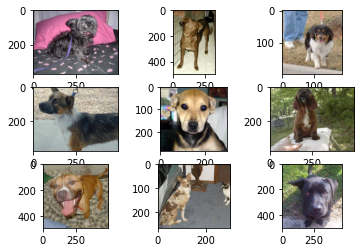

In [ ]:
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = 'train/train'
# plot first few images
for i in range(9):
    # define subplot
    pyplot.subplot(3,3,i+1)
    # define filename
    filename = folder + "/" +'dog.' + str(i) + '.jpg'
    # load image pixels
    image = imread(filename)
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()

In [3]:
import sys
from matplotlib import pyplot
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

# Building a basic Model

In [ ]:
# Initiating a sequential model
model = Sequential()

#Convulation layer with 32 filters
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
# Maxpooling layer
model.add(MaxPooling2D((2, 2)))
# Flatten the layer
model.add(Flatten())
#Adding a dense layer
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
# using sigmoid layer for binary classification 
model.add(Dense(1, activation='sigmoid'))
# compile model
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

2022-01-25 13:58:11.925968: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-25 13:58:11.937995: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-25 13:58:11.938860: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-25 13:58:11.941491: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-25 13:58:11.942404: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read f

# Creating Data Generator with image augmentation

In [ ]:
# create data generator for training with rescaling and data augmentation
datagen_train = ImageDataGenerator(rescale=1.0/255.0,horizontal_flip=True,
rotation_range=90)
datagen_val=ImageDataGenerator(rescale=1.0/255.0)

In [ ]:
train_generator = datagen_train.flow_from_directory(
        'dataset_dogs_vs_cats/train',  # this is the target directory
        target_size=(200, 200),  # all images will be resized to 200x200
        batch_size=64,
        class_mode='binary') 

Found 20006 images belonging to 2 classes.


In [ ]:
val_generator = datagen_val.flow_from_directory(
        'dataset_dogs_vs_cats/val',  # this is the target directory
        target_size=(200, 200),  # all images will be resized to 200x200
        batch_size=64,
        class_mode='binary'
) 

Found 4994 images belonging to 2 classes.


# Fitting the model

In [ ]:
history=model.fit_generator(
        train_generator,
        steps_per_epoch=train_generator.samples // 64,
        epochs=10,
        validation_data=val_generator,
        validation_steps=val_generator.samples // 64)

/usr/local/lib/python3.8/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2022-01-25 14:00:36.432776: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2022-01-25 14:00:38.081095: I tensorflow/stream_executor/cuda/cuda_dnn.cc:381] Loaded cuDNN version 8204


312/312 [==============================] - 198s 625ms/step - loss: 2.4389 - accuracy: 0.5742 - val_loss: 0.6292 - val_accuracy: 0.6661
Epoch 2/10
312/312 [==============================] - 195s 624ms/step - loss: 0.6840 - accuracy: 0.6360 - val_loss: 0.7359 - val_accuracy: 0.6092
Epoch 3/10
312/312 [==============================] - 195s 624ms/step - loss: 0.6207 - accuracy: 0.6652 - val_loss: 0.6271 - val_accuracy: 0.6733
Epoch 4/10
312/312 [==============================] - 195s 624ms/step - loss: 0.6067 - accuracy: 0.6724 - val_loss: 0.5876 - val_accuracy: 0.6959
Epoch 5/10
312/312 [==============================] - 197s 631ms/step - loss: 0.5900 - accuracy: 0.6884 - val_loss: 0.6025 - val_accuracy: 0.6919
Epoch 6/10
312/312 [==============================] - 197s 630ms/step - loss: 0.5858 - accuracy: 0.6895 - val_loss: 0.5722 - val_accuracy: 0.7085
Epoch 7/10
312/312 [==============================] - 196s 627ms/step - loss: 0.5715 - accuracy: 0.7048 - val_loss: 0.5699 - val_accura

# Learning Curves

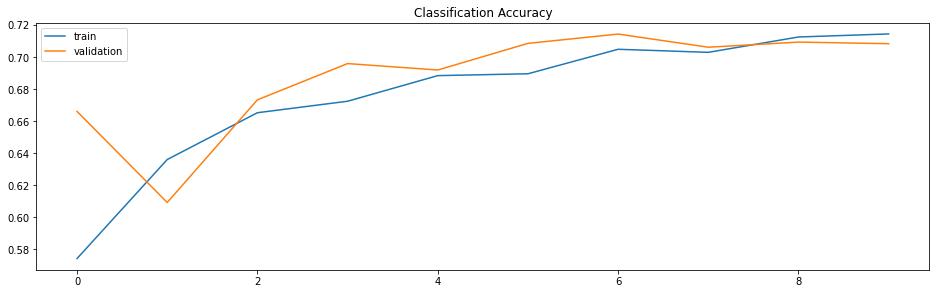

In [ ]:
# plot accuracy
plt.figure(figsize=(16,10))
pyplot.subplot(212)
pyplot.title('Classification Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='validation')
pyplot.legend()

In [ ]:
model.save_weights('first_try.h5')

# Second Model With Drop Out

In [ ]:
from keras.layers import Dropout
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 100, 100, 32)      0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 100, 100, 64)      18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 50, 50, 128)      

In [ ]:
import PIL
history=model.fit_generator(
        train_generator,
        steps_per_epoch=train_generator.samples // 64,
        epochs=10,
        validation_data=val_generator,
        validation_steps=val_generator.samples // 64)

Epoch 1/10
312/312 [==============================] - 200s 635ms/step - loss: 1.6713 - accuracy: 0.5142 - val_loss: 0.6882 - val_accuracy: 0.5661
Epoch 2/10
312/312 [==============================] - 201s 643ms/step - loss: 0.6769 - accuracy: 0.5655 - val_loss: 0.6425 - val_accuracy: 0.6076
Epoch 3/10
312/312 [==============================] - 212s 680ms/step - loss: 0.6367 - accuracy: 0.6359 - val_loss: 0.6012 - val_accuracy: 0.6631
Epoch 4/10
312/312 [==============================] - 201s 644ms/step - loss: 0.5976 - accuracy: 0.6785 - val_loss: 0.5752 - val_accuracy: 0.6857
Epoch 5/10
312/312 [==============================] - 198s 635ms/step - loss: 0.5787 - accuracy: 0.7013 - val_loss: 0.5680 - val_accuracy: 0.6851
Epoch 6/10
312/312 [==============================] - 189s 607ms/step - loss: 0.5626 - accuracy: 0.7128 - val_loss: 0.5416 - val_accuracy: 0.7312
Epoch 7/10
312/312 [==============================] - 193s 619ms/step - loss: 0.5477 - accuracy: 0.7207 - val_loss: 0.5412 -

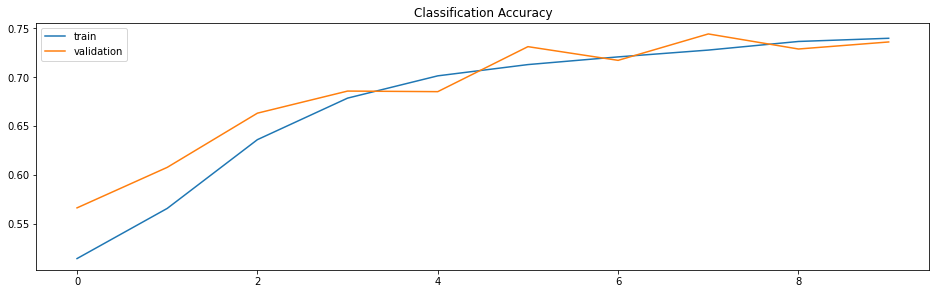

In [ ]:
# plot accuracy
plt.figure(figsize=(16,10))
pyplot.subplot(212)
pyplot.title('Classification Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='validation')
pyplot.legend()

In [ ]:
model.save_weights('second_try_with_dropout.h5')

# Transfer Learning

In [4]:
from keras.applications.vgg16 import VGG16
import PIL
from keras.models import Model

In [ ]:
inputs=keras.Input(shape=(200,200,3))

In [ ]:
model = VGG16(include_top=False, input_shape=(200, 200, 3))
# mark loaded layers as not trainable
model.trainable = False
# add new classifier layers
flat1 = Flatten()(model.layers[-1].output)
class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
output = Dense(1, activation='sigmoid')(class1)
# define new model
model = Model(inputs=model.inputs, outputs=output)
# compile model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.8/dist-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 200, 200, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 50, 50, 128)       0     

In [ ]:
history=model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // 64,
        epochs=10,
        validation_data=val_generator,
        validation_steps=val_generator.samples // 64)

Epoch 1/10
312/312 [==============================] - 233s 742ms/step - loss: 0.4525 - accuracy: 0.7776 - val_loss: 0.2866 - val_accuracy: 0.8736
Epoch 2/10
312/312 [==============================] - 208s 667ms/step - loss: 0.3401 - accuracy: 0.8514 - val_loss: 0.2393 - val_accuracy: 0.8964
Epoch 3/10
312/312 [==============================] - 210s 671ms/step - loss: 0.3222 - accuracy: 0.8577 - val_loss: 0.2188 - val_accuracy: 0.9091
Epoch 4/10
312/312 [==============================] - 209s 670ms/step - loss: 0.3076 - accuracy: 0.8656 - val_loss: 0.2553 - val_accuracy: 0.8840
Epoch 5/10
312/312 [==============================] - 210s 673ms/step - loss: 0.3055 - accuracy: 0.8669 - val_loss: 0.2078 - val_accuracy: 0.9117
Epoch 6/10
312/312 [==============================] - 210s 673ms/step - loss: 0.2889 - accuracy: 0.8744 - val_loss: 0.2082 - val_accuracy: 0.9085
Epoch 7/10
312/312 [==============================] - 209s 668ms/step - loss: 0.2894 - accuracy: 0.8735 - val_loss: 0.2340 -

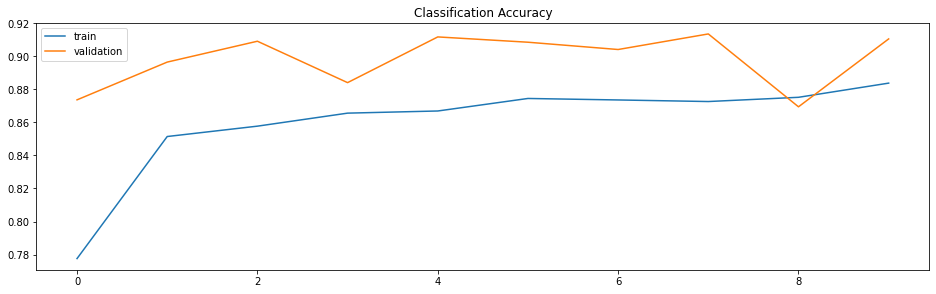

In [ ]:
# plot accuracy
plt.figure(figsize=(16,10))
pyplot.subplot(212)
pyplot.title('Classification Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='validation')
pyplot.legend()

# Training all the weights

In [ ]:
model.trainable = True

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 200, 200, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 50, 50, 128)       0     

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.00001)

In [ ]:
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history=model.fit_generator(
        train_generator,
        steps_per_epoch=train_generator.samples // 64,
        epochs=10,
        validation_data=val_generator,
        validation_steps=val_generator.samples // 64)

/usr/local/lib/python3.8/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2022-01-25 23:16:52.575754: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2022-01-25 23:16:54.937397: I tensorflow/stream_executor/cuda/cuda_dnn.cc:381] Loaded cuDNN version 8204


312/312 [==============================] - 503s 2s/step - loss: 0.2397 - accuracy: 0.8943 - val_loss: 0.0906 - val_accuracy: 0.9637
Epoch 2/10
312/312 [==============================] - 445s 1s/step - loss: 0.1211 - accuracy: 0.9502 - val_loss: 0.0630 - val_accuracy: 0.9774
Epoch 3/10
312/312 [==============================] - 436s 1s/step - loss: 0.0929 - accuracy: 0.9633 - val_loss: 0.0562 - val_accuracy: 0.9780
Epoch 4/10
312/312 [==============================] - 436s 1s/step - loss: 0.0760 - accuracy: 0.9703 - val_loss: 0.0554 - val_accuracy: 0.9798
Epoch 5/10
312/312 [==============================] - 436s 1s/step - loss: 0.0705 - accuracy: 0.9721 - val_loss: 0.0506 - val_accuracy: 0.9808
Epoch 6/10
312/312 [==============================] - 436s 1s/step - loss: 0.0644 - accuracy: 0.9756 - val_loss: 0.0456 - val_accuracy: 0.9836
Epoch 7/10
312/312 [==============================] - 436s 1s/step - loss: 0.0540 - accuracy: 0.9797 - val_loss: 0.0399 - val_accuracy: 0.9836
Epoch 8/10

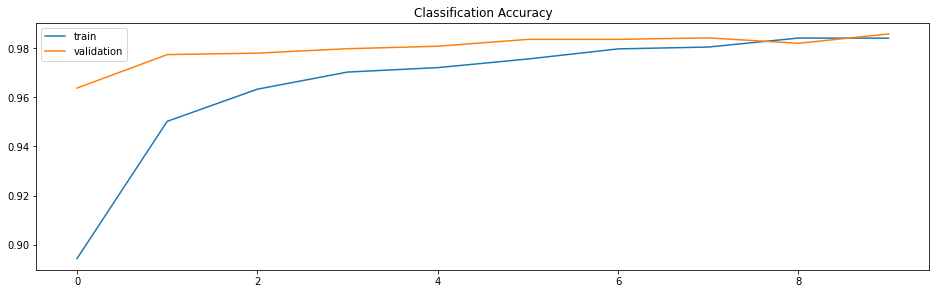

In [ ]:
# plot accuracy
plt.figure(figsize=(16,10))
pyplot.subplot(212)
pyplot.title('Classification Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='validation')
pyplot.legend()

In [ ]:
model.save_weights('fourth_try_with_vgg16.h5')

# Resnet

In [ ]:
from keras.applications.resnet import ResNet50

In [ ]:
model = ResNet18(include_top=False, input_shape=(200, 200, 3))
# mark loaded layers as not trainable
model.trainable = False
# add new classifier layers
flat1 = Flatten()(model.layers[-1].output)
class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
output = Dense(1, activation='sigmoid')(class1)
# define new model
model = Model(inputs=model.inputs, outputs=output)
# compile model
opt = keras.optimizers.Adam(learning_rate=0.00001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 200, 200, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 206, 206, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 100, 100, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 100, 100, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history=model.fit_generator(
        train_generator,
        steps_per_epoch=train_generator.samples // 64,
        epochs=10,
        validation_data=val_generator,
        validation_steps=val_generator.samples // 64)

/usr/local/lib/python3.8/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2022-01-26 10:28:59.211879: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2022-01-26 10:29:03.712638: I tensorflow/stream_executor/cuda/cuda_dnn.cc:381] Loaded cuDNN version 8204


312/312 [==============================] - 288s 904ms/step - loss: 0.6677 - accuracy: 0.5916 - val_loss: 0.6466 - val_accuracy: 0.6184
Epoch 2/10
312/312 [==============================] - 231s 740ms/step - loss: 0.6472 - accuracy: 0.6244 - val_loss: 0.6159 - val_accuracy: 0.6667
Epoch 3/10
312/312 [==============================] - 226s 723ms/step - loss: 0.6371 - accuracy: 0.6343 - val_loss: 0.6041 - val_accuracy: 0.6759
Epoch 4/10
312/312 [==============================] - 230s 737ms/step - loss: 0.6273 - accuracy: 0.6479 - val_loss: 0.6069 - val_accuracy: 0.6699
Epoch 5/10
312/312 [==============================] - 245s 783ms/step - loss: 0.6214 - accuracy: 0.6571 - val_loss: 0.5935 - val_accuracy: 0.6877
Epoch 6/10
312/312 [==============================] - 228s 731ms/step - loss: 0.6183 - accuracy: 0.6578 - val_loss: 0.5890 - val_accuracy: 0.6897
Epoch 7/10
 71/312 [=====>........................] - ETA: 2:37 - loss: 0.6081 - accuracy: 0.6681

# Since VGG 16 gave us the best result, let's predict with that model

In [20]:
model = VGG16(include_top=False, input_shape=(200, 200, 3))
# mark loaded layers as not trainable
model.trainable = False
# add new classifier layers
flat1 = Flatten()(model.layers[-1].output)
class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
output = Dense(1, activation='sigmoid')(class1)
# define new model
model = Model(inputs=model.inputs, outputs=output)
# compile model
opt = keras.optimizers.Adam(learning_rate=0.00001)

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# Loading Model Weights

In [21]:
model.load_weights("fourth_try_with_vgg16.h5")

# Defining the function to predict inlcuding pre processing

In [24]:
from keras.preprocessing import image
import numpy as np

In [26]:
def predict_model(image_path,model):
    img=image.load_img(image_path,target_size=(200,200))
    img_arr=image.img_to_array(img)/255
    img_arr=np.expand_dims(img_arr,axis=0)
    pred=model.predict(img_arr)
    #pred = tensorflow.keras.np_utils.probas_to_classes(y_proba)
    pred="Probability of being a dog is " + str(pred[0][0])
    return pred

In [29]:
img=image.load_img("dog_test.jpg",target_size=(200,200))

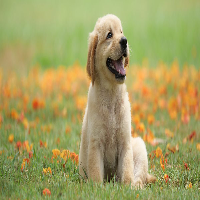

In [30]:
img

In [32]:
predict_model("dog_test.jpg",model)

'Probability of being a dog is 0.9999768'